# Continuous optimization - Rastrigin - dimension 50

## Importing libraries

In [1]:
import pickle
import pandas as pd
import os
import numpy as np
import os
import time
import math
import matplotlib.pyplot as plt
from numba import jit
from scipy import optimize
import pygmo as pg
from mpl_toolkits import mplot3d

In [2]:
path = '../data/'
export_path = '../data/'

Dict_funcs = {"sphere": 0, "schwefel": 1, "rosenbrock": 2, "rastrigin": 3, "griewank": 4, "ackley": 5}

funcs_name = {"sphere": "F1 : Shifted Sphere Function", "schwefel": "F2 : Schwefel’s Problem 2.21", "rosenbrock": "F3 : Shifted Rosenbrock’s Function",
                  "rastrigin": "F4 : Shifted Rastrigin’s Function",
                  "griewank": "F5 : Shifted Griewank’s Function",
                  "ackley": "F6 : Shifted Ackley’s Function"}

In [3]:
def read_values(func_name):
    values_path = str(path) + str(func_name) + '.csv'
    bias_path = str(path) + 'f_bias.csv'
    interval_path = str(path) + 'interval.csv'

    func_val = pd.read_csv(values_path)
    bias_val = pd.read_csv(bias_path)
    interval_df = pd.read_csv(interval_path,sep=';')

    funcval = func_val.List_values.values
    bias = bias_val.List_values.values[Dict_funcs[func_name]]
    search_space = list(interval_df.iloc[Dict_funcs[func_name],1:3])

    return funcval, bias, search_space

In [4]:

# function evaluation definitions

@jit(nopython=True)
def eval_cost(x, dim):
    if func_name == "sphere":
        F = 0
        for i in range(dim - 1):
            z = x[i] - funcval[i]
            F += z ** 2 # sum of z²
        result = F + bias # sum of z² + bias
    elif func_name == "schwefel":
        F = abs(x[0] - funcval[0]) # initial
        for i in range(1, dim - 1):
            z = x[i] - funcval[i]
            F = max(F, abs(z)) # max 'absZ_i, i in [1,D]}
        result = F + bias
    elif func_name == "rosenbrock":
        F = 0
        z = np.empty(dim)
        for i in range(dim - 1):
            z[i] = x[i] - funcval[i] + 1
        for i in range(dim - 2):
            F += 100 * (z[i + 1] ** 2 - z[i] ** 2) + (1 - z[i]) ** 2
        result = F + bias
    elif func_name == "rastrigin":
        F = 0
        for i in range(dim - 1):
            z = x[i] - funcval[i]
            F += z ** 2 - 10 * math.cos(2 * math.pi * z) + 10
        result = F + bias
    elif func_name == "griewank":
        F1 = 0
        F2 = 1
        for i in range(dim - 1):
            z = x[i] - funcval[i]
            F1 += z ** 2 / 4000
            F2 += math.cos(z / math.sqrt(i + 1))
        result = F1 - F2 + 1 + bias
    elif func_name == "ackley":
        Sum_0 = 0
        Sum_1 = 0
        for i in range(dim - 1):
            z = x[i] - funcval[i]
            Sum_0 += z ** 2
            Sum_1 += math.cos(2 * math.pi * z)
        result = -20 * math.exp(-0.2 * math.sqrt(Sum_0 / dim)) - math.exp(Sum_1 / dim) + 20 + math.e + bias
    else:
        result = 0
    return result

In [5]:
def plot_func(func_name):
    DIM = 2
    x = np.linspace(search_space[0], search_space[1], 250)
    X = np.meshgrid(x, x)

    if func_name == "sphere":
        F = 0
        for i in range(DIM - 1):
            z = X[i] - funcval[i]
            F += z ** 2
        result = F + bias
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.plot_surface(X[0], X[1], result, rstride=5, cstride=5, cmap='jet', alpha=.4, edgecolor='none')
        plt.show()
    elif func_name == "schwefel":
        F = np.abs(X[0] - funcval[0]) # initial
        for i in range(1, DIM - 1):
            z = X[i] - funcval[i]
            F = np.max(F, np.abs(z))
        result = F + bias
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        surf = ax.plot_surface(X[0], X[1], result, rstride=5, cstride=5, cmap='jet', alpha=.4, edgecolor='none')
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()
    elif func_name == "rosenbrock":
        F = 0
        z = np.ndarray(DIM)

        for i in range(DIM - 1):
            z[i] = X[i] - np.ndarray(funcval[i]) + np.ndarray(1)
        for i in range(DIM - 2):
            F += 100 * (z[i + 1] ** 2.0 - z[i] ** 2.0) + (1 - z[i]) ** 2.0
            result = F + bias
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.plot_surface(X[0], X[1], result, rstride=5, cstride=5, cmap='jet', alpha=.4, edgecolor='none')
        plt.show()
    elif func_name == "rastrigin":
        F = 0
        for i in range(DIM - 1):
            z = X[i] - funcval[i]
            F += z ** 2 - 10 * np.cos(2 * np.pi * z) + 10
        result = F + bias
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.plot_surface(X[0], X[1], result, rstride=5, cstride=5, cmap='jet', alpha=.4, edgecolor='none')
        plt.show()
    elif func_name == "griewank":
        F1 = 0
        F2 = 1
        for i in range(DIM - 1):
            z = X[i] - funcval[i]
            F1 += z ** 2 / 4000
            F2 += np.cos(z / np.sqrt(i + 1))
        result = F1 - F2 + 1 + bias
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.plot_surface(X[0], X[1], result, rstride=5, cstride=5, cmap='jet', alpha=.4, edgecolor='none')
        plt.show()
    elif func_name == "ackley":
        Sum_0 = 0
        Sum_1 = 0
        for i in range(DIM - 1):
            z = X[i] - funcval[i]
            Sum_0 += z ** 2
            Sum_1 += np.cos(2 * math.pi * z)
        result = -20 * np.exp(-0.2 * np.sqrt(Sum_0 / DIM)) - np.exp(Sum_1 / DIM) + 20 + math.e + bias
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.plot_surface(X[0], X[1], result, rstride=5, cstride=5, cmap='jet', alpha=.4, edgecolor='none')
        plt.show()
    else:
        result = 0

In [6]:
# Define problem Class
class Problem:
    def __init__(self, dim, bounds, glob_opt):
        self.lower = -bounds[1]
        self.upper = bounds[1]
        self.dim = dim
        self.fitness_per_eval = []
        self.glob_opt = glob_opt

    def fitness(self, x):
        result = abs(eval_cost(x, self.dim) - bias)
        return [result]

    def get_bounds(self):
        x_min = self.lower * np.ones(self.dim)
        x_max = self.upper * np.ones(self.dim)
        return x_min, x_max

In [7]:
path = '../data/'
func_name = 'rastrigin'
funcval, bias, search_space = read_values(func_name)

## Plot representation in 2D of the problem

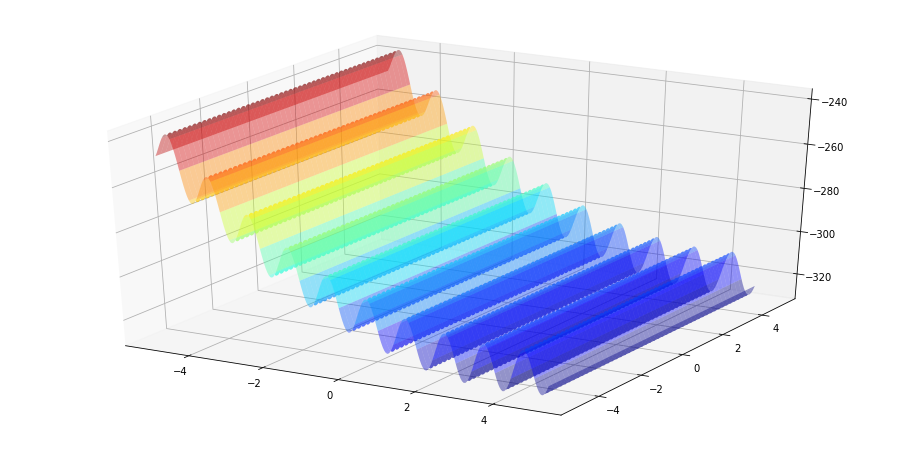

In [8]:
plot_func(func_name)

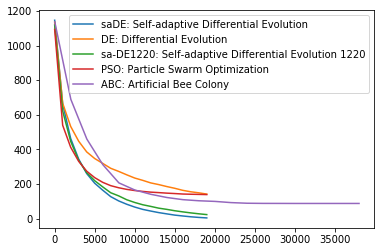

In [9]:
# choose the best algorithm for the problem
# gen = 5000
pop_size = 20
DIM = 50

List_algo = [pg.sade(gen=1000), pg.de(gen=1000), pg.de1220(gen=1000), pg.pso(gen=1000), pg.bee_colony(gen=1000, limit=20)]

plt.figure()
for uda in List_algo:
     logs = []
     for i in range(25):
         algo = pg.algorithm(uda)
         algo.set_verbosity(50) # regulates both screen and log verbosity
         prob = pg.problem(Problem(DIM, search_space, bias))
         pop = pg.population(prob, pop_size)
         pop = algo.evolve(pop)
         logs.append(algo.extract(type(uda)).get_log())
     logs = np.array(logs)
     avg_log = np.average(logs,0)

     plt.plot(avg_log[:,1],avg_log[:,2] , label=algo.get_name()) 
plt.savefig("./Results/comparaison_rastrigin_50" + ".png")
plt.legend()
plt.show()

The SADE algorithm seems to be well adapted to the probem.

----------------------------------------------------------------------------------------------------
Problem dimension: 50
Function: 3
Search Space :  [-5, 5]
Global Optimum: -330.00
----------------------------------------------------------------------------------------------------
Algorithm used: saDE: Self-adaptive Differential Evolution
Parameters used : 
	Generations: 1000
	Variant: 2
	Self adaptation variant: 1
	Stopping xtol: 1e-06
	Stopping ftol: 1e-06
	Memory: false
	Verbosity: 100
	Seed: 963698751
Fitness: 0.141031
Solution: 
           X
0   3.847507
1   4.320333
2  -2.819234
3   0.647202
..       ...
46  0.213740
47 -4.267874
48  3.682537
49  3.381100

[50 rows x 1 columns]
Number of iterations: 500500
Stopping criterion: after 901 iterations
computational time: 4.884 seconds


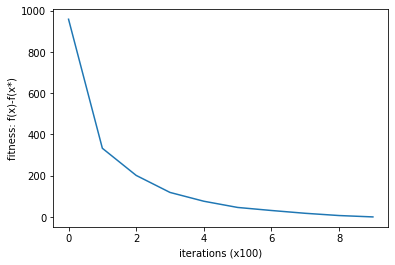

In [10]:
# define algorithm
DIM = 50
pop_size = 500
gen=2500
algo = pg.algorithm(pg.sade(gen=1000))

prob = pg.problem(Problem(DIM, search_space, bias))
pop = None
pop = pg.population(prob, pop_size)

pop.champion_x
pop.champion_f

algo.set_verbosity(100)
t1 = time.time()
pop = algo.evolve(pop)
t2 = time.time()
duration = t2 - t1
extract_algo = algo.extract(pg.sade)
log = extract_algo.get_log()
curve = [x[2] for x in log]
nit = log[-1][0]

# function to make print report of function solving
algorithm_name = algo.get_name()
parameters = algo.get_extra_info()
solution_x = pop.champion_x
fitness = pop.champion_f[0]
n_evals = pop.problem.get_fevals()
print('-' * 100)
print("Problem dimension: %d" % DIM)
print("Function: %s" % Dict_funcs[func_name])
print("Search Space : ", search_space)
print("Global Optimum: %.2f" % bias)
print('-' * 100)
print("Algorithm used: %s" % algorithm_name)
print("Parameters used : \n%s" % parameters)
print("Fitness: %f" % fitness)
print("Solution: ")
with pd.option_context('display.max_rows', 8):
    print(pd.DataFrame(solution_x, columns=['X']))
print("Number of iterations: %d" % n_evals)
print("Stopping criterion: after %d iterations" % nit)
print("computational time: %.3f seconds" % duration)

plt.figure()
plt.plot(curve)
plt.xlabel("iterations (x100)")
plt.ylabel("fitness: f(x)-f(x*)")
plt.savefig("./Results/sol_rastrigin_50" + ".png")
plt.show()